In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
from urllib.request import urlretrieve
import os
import datetime as dt 
import seaborn as sns 

In [3]:
path=os.getcwd()
dir_list=os.listdir(path)
print(os.path.join(path, 'googleplaystore.csv'))



C:\Users\turki\Downloads\googleplaystore.csv


# Load the Data 

In [4]:
url='https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv'
data=urlretrieve(url, 'googleplaystore.csv')
data

('googleplaystore.csv', <http.client.HTTPMessage at 0x2cd28109e88>)

In [5]:
new_data=pd.read_csv('C:/Users/turki/Documents/googleplaystore.csv')
new_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [43]:
new_data.shape

(10841, 13)

# Data Cleaning 

In [6]:
#Remove Genres, current ver, and Android version  columns from the data
df1= new_data.drop(['Genres', 'Current Ver','Android Ver'], 1)
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,15-Jan-18
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,20-Jun-18


In [7]:
# Remove text and 'M' from size column 
# converting size
df1['Size']=df1['Size'].str.replace('M','')


In [8]:
df1['Size']=df1['Size'].str.replace('k','')

In [9]:
df1['Size']=df1['Size'].str.strip('+')

In [10]:
df1.drop(df1[df1.Size == 'Varies with device'].index,axis=0, inplace=True)

In [11]:
df1=df1.loc[df1['Size']!='1,000']

In [12]:
df1.Size=df1.Size.astype('float')

In [13]:
df1=df1.loc[df1['Installs']!='Free',:]

In [14]:
#remove '+' sign in Installs column 
df1['Installs']=df1['Installs'].str.replace(',','').str.replace('+','').astype('int')
 

In [15]:
df1=df1.loc[df1['Price']!='Everyone',:]

In [16]:
#remove '$' sign from price 
#detect non-numeric values 
df1['Price']=df1['Price'].str.replace('$','').astype('float')



In [17]:
#convert columns to correct data types 
df1=df1.loc[df1['Reviews']!='3.0M',:]



In [18]:
df1['Reviews']=df1['Reviews'].astype('int')

In [19]:
df1['Rating']=df1['Rating'].astype('float')

In [20]:

df1['App']=df1['App'].str.replace('[^a-zA-Z]',' ')


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 10 columns):
App               9145 non-null object
Category          9145 non-null object
Rating            7729 non-null float64
Reviews           9145 non-null int32
Size              9145 non-null float64
Installs          9145 non-null int32
Type              9145 non-null object
Price             9145 non-null float64
Content Rating    9145 non-null object
Last Updated      9145 non-null object
dtypes: float64(3), int32(2), object(5)
memory usage: 714.5+ KB


In [22]:
# Detect null values 
df1.isnull().sum()


App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [23]:
#drop null values 
df1.dropna(axis=0, how='any', inplace=True)
df1.head()
df1.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

In [42]:
df1.shape

(7729, 10)

# Describe the data

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df1.describe()

,Rating,Reviews,Size,Installs,Price
count,7729.000,7729.000,7729.000,7729.000,7729.000
mean,4.174,294672.551,37.285,8417733.512,1.128
std,0.545,1863227.090,93.509,50138457.368,17.401
min,1.000,1.000,1.000,1.000,0.000
25%,4.000,108.000,6.100,10000.000,0.000
50%,4.300,2328.000,16.000,100000.000,0.000
75%,4.500,38961.000,37.000,1000000.000,0.000
max,5.000,44893888.000,994.000,1000000000.000,400.000


Based on the summary statistics above, we see that the average rating is almost 4.17. The median rating is 4.3 and the maximum rating is 5. The minimum rating is 1. 

In [25]:
#Genre with the max average rating
df2=df1.groupby(by='Category', axis=0).mean().sort_values(by='Rating',ascending=False)
print(df2['Rating'].head(1), df2['Rating'].tail(1))



Category
EVENTS   4.479
Name: Rating, dtype: float64 Category
DATING   3.958
Name: Rating, dtype: float64


We calculated the average rating for each category. The max average rating (4.435) belongs to the category 'EVENTS' and the minimum to 'DATING' (3.97)

Text(0.5, 1.0, 'App Rating (Free vs. Paid)')

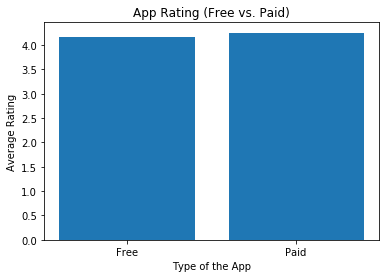

In [26]:
#Free vs. Paid App average rating
plt.bar(df1['Type'].unique(),df1.groupby('Type')['Rating'].mean())
plt.xlabel('Type of the App')
plt.ylabel('Average Rating')
plt.title('App Rating (Free vs. Paid)')

The difference in average rating between free and paid apps is not significant. 

Text(0.5, 1.0, 'Rating by Different Age Group')

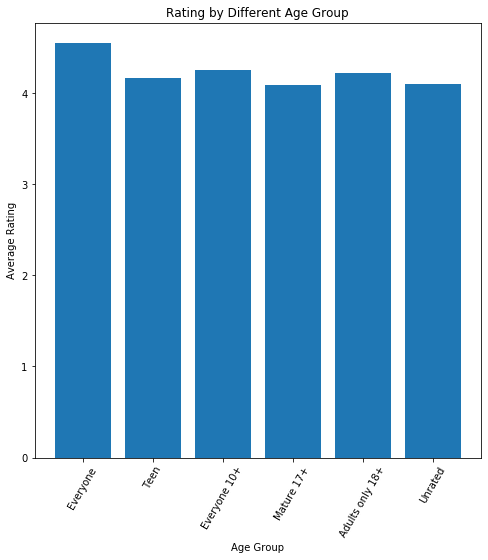

In [27]:
plt.figure(figsize=(8,8))
plt.bar(df1['Content Rating'].unique(),df1.groupby('Content Rating')['Rating'].mean())
plt.xticks(fontsize=10, rotation=60)
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Rating by Different Age Group')

The bar graph above shows that there is not significant difference between the average ratings of the age groups. 

Text(0.5, 1.0, 'Distribution of Rating')

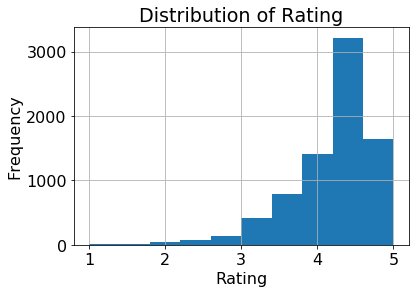

In [28]:
plt.rcParams.update({'font.size': 16})
df1.Rating.hist()
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')

The histogram above displays the distribution of 'Rating'. The distribution of 'Rating' variable is left skewed. That is, since there are small rating values (below 2) the distribution shows some skewness to the left.However, most of the rating values are above 3. 

Text(0.5, 1.0, 'Distribution of Rating')

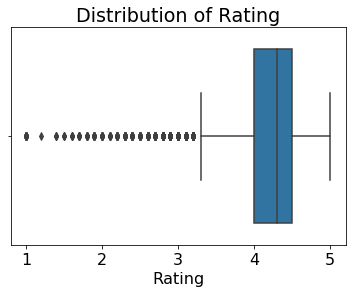

In [29]:
import seaborn as sns
sns.boxplot('Rating', data=df1)
plt.title('Distribution of Rating')

the box plot above considers rating values below 3 as outliers. It also suggests that most of the rating values are above 3. 

# Most Popular Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text yticklabel objects>)

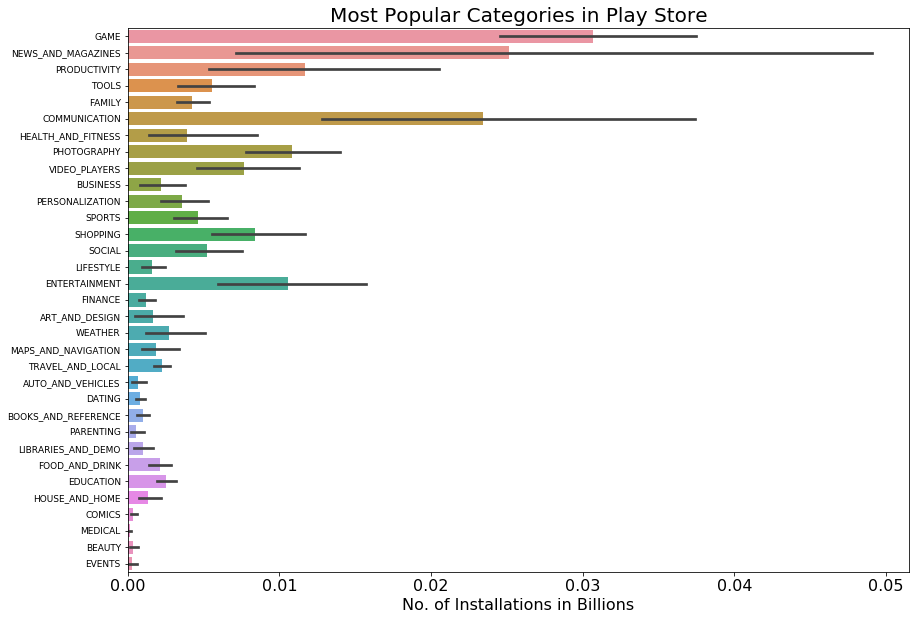

In [30]:
df1.Installs = df1.Installs/1000000000# converting into billions
df1=df1.sort_values(by='Installs', ascending=False)
plt.figure(figsize = (14,10))

ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df1 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)
plt.yticks(fontsize=9)


If we use number of installs as an indicator for popularity then 'GAME' is the most popular category in google play store. 

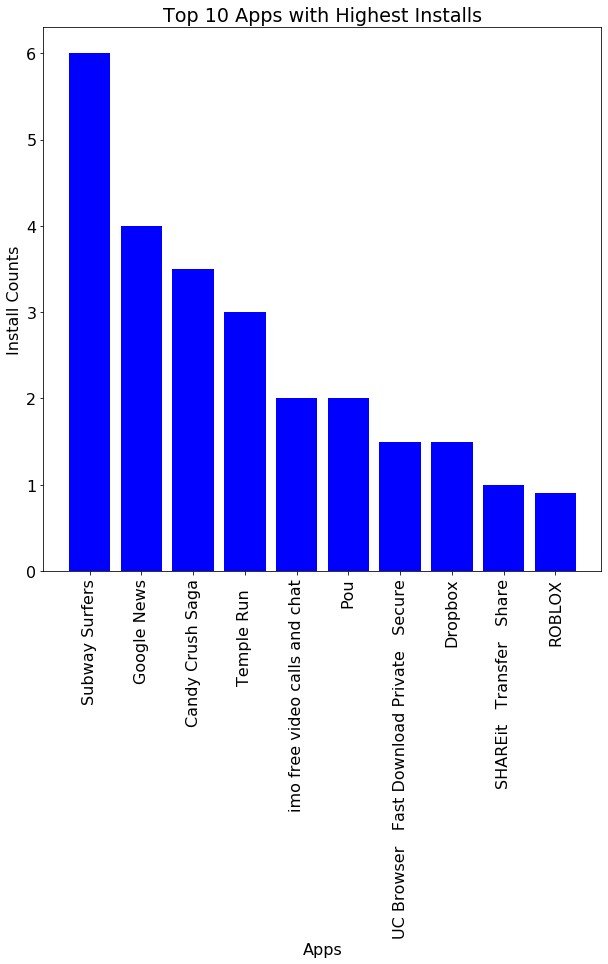

In [31]:
res = df1.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(10,10))
plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps with Highest Installs")
plt.show()

'Subway Surfers' in 'GAME' category is the most installed app followed by 'Google News'

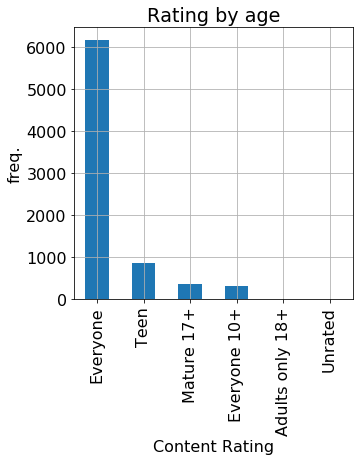

In [32]:
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 16})
df1['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')
plt.title('Rating by age')
plt.xticks(rotation=90)
plt.grid()
plt.show()

As one can see in the bar graph above that majority of the apps are rated by people from all age groups (Everyone). 

# Apps with most installs 

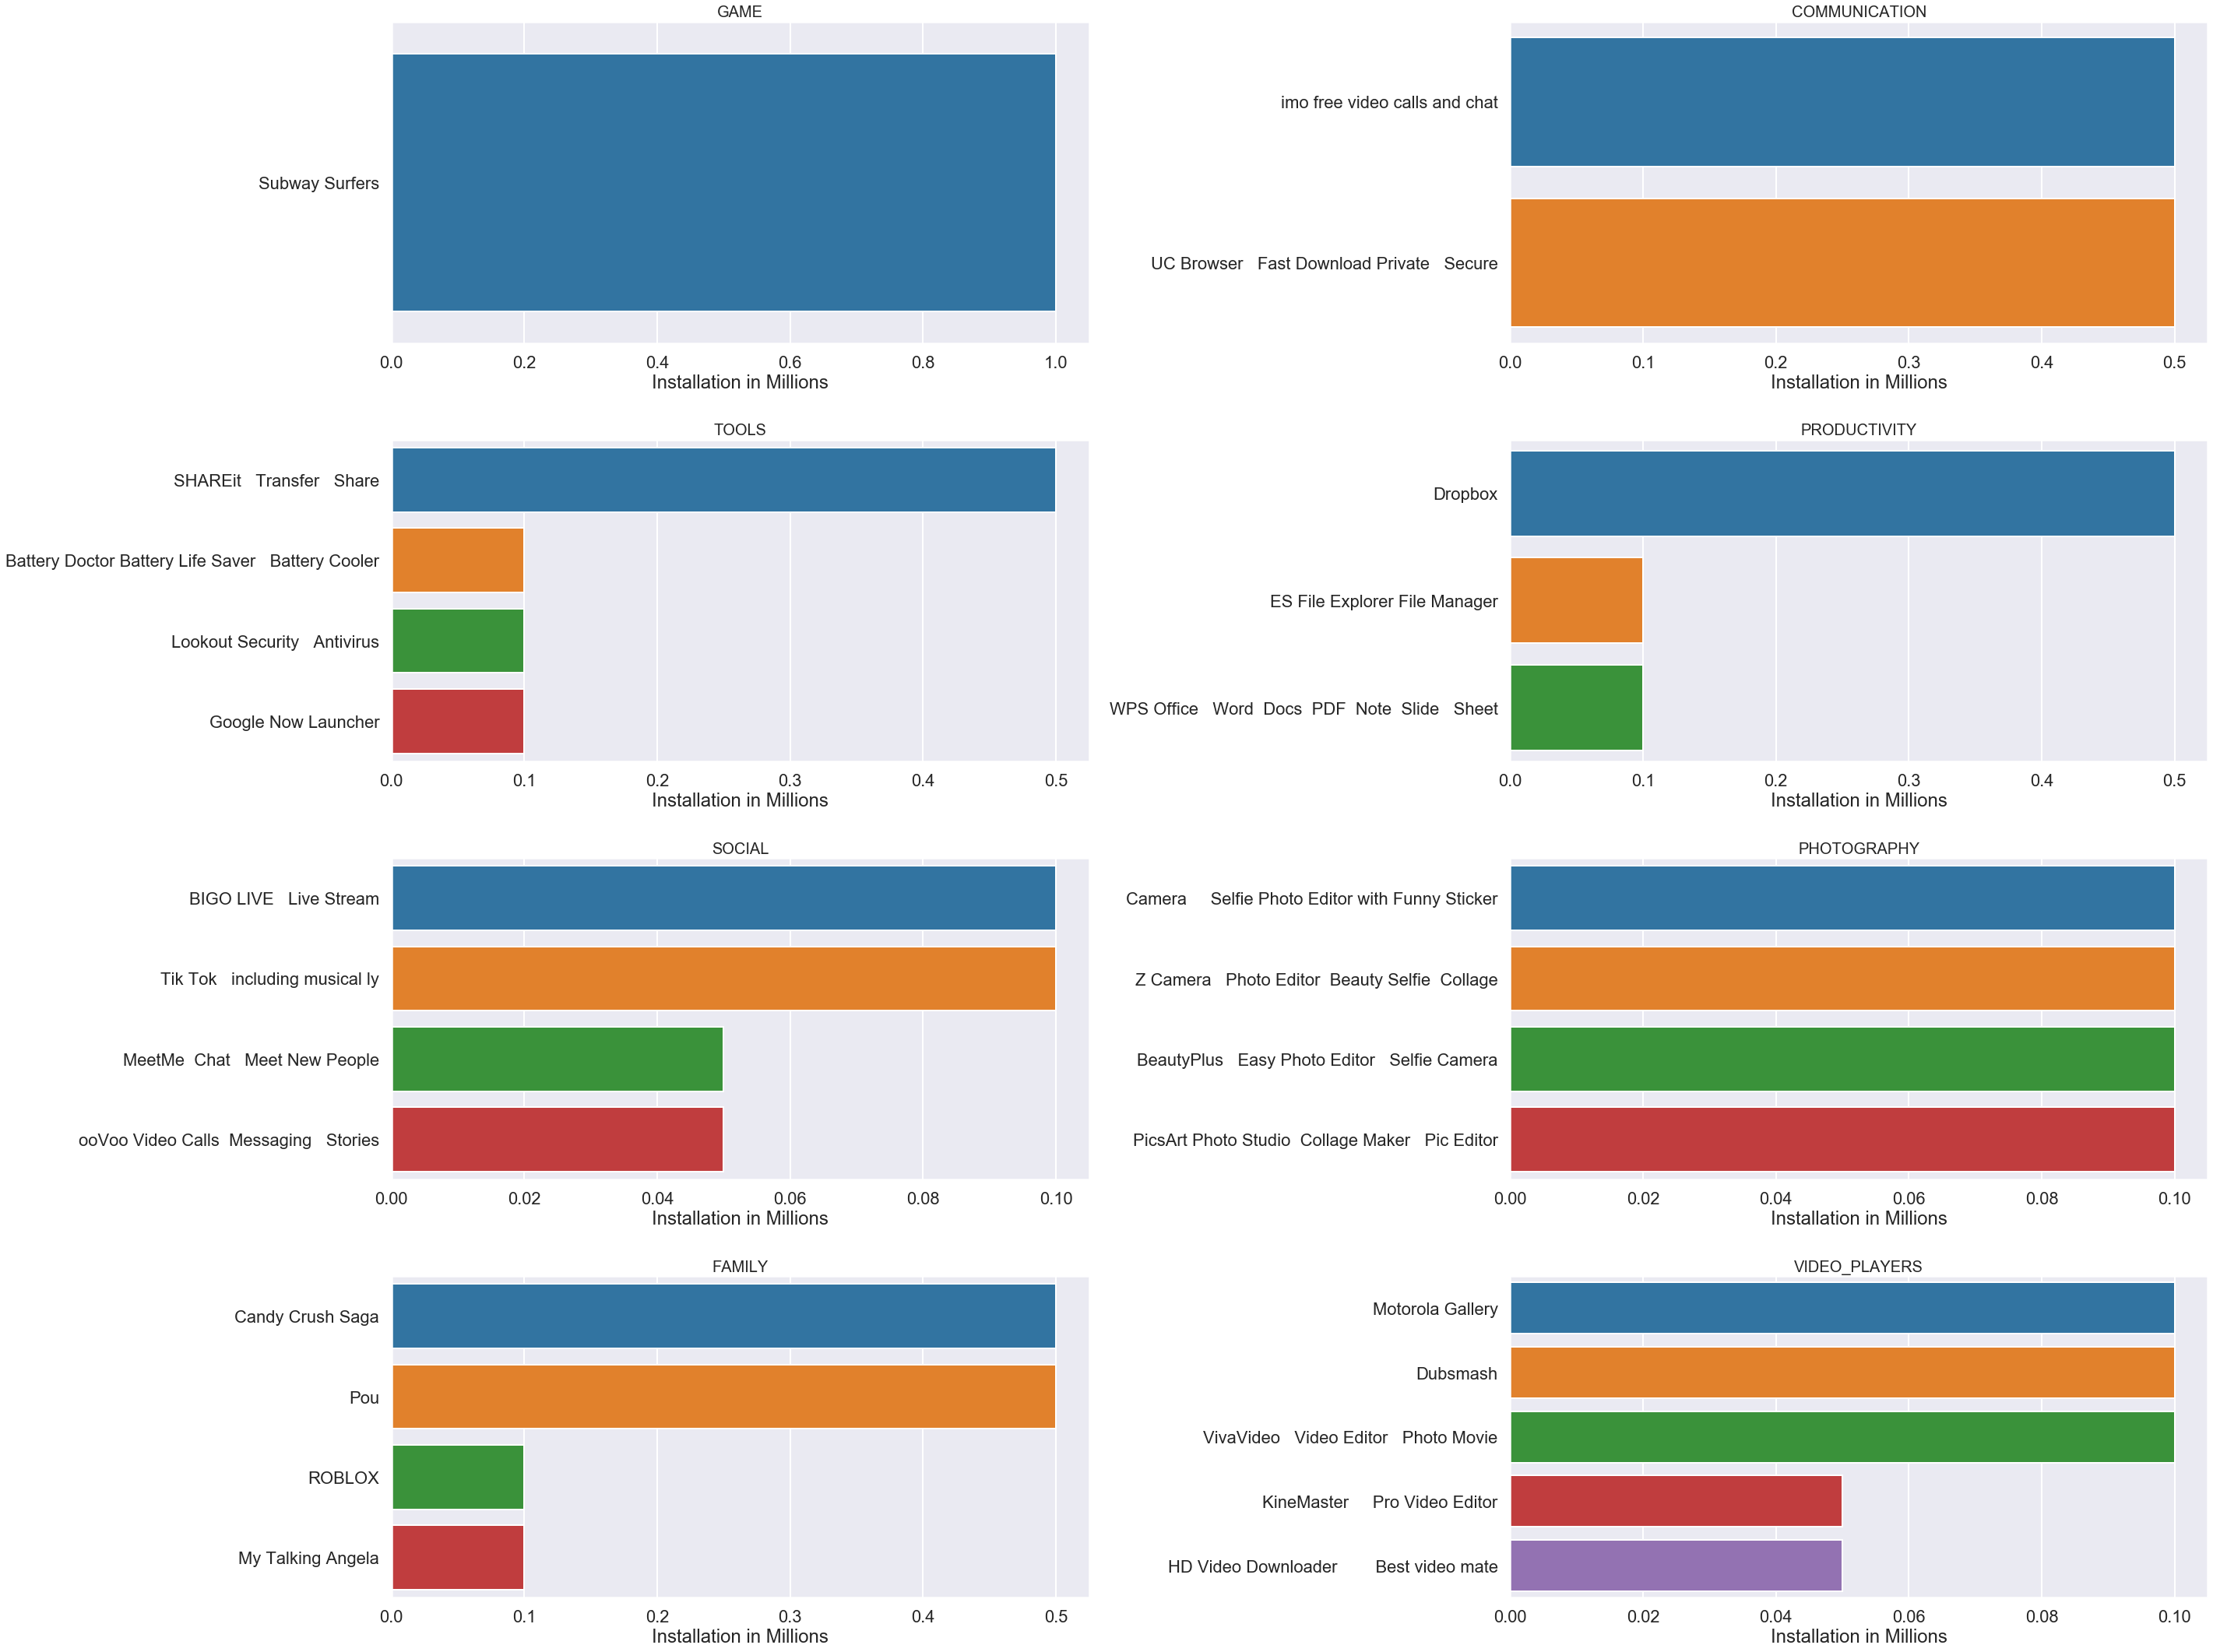

In [33]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY','FAMILY', 'VIDEO_PLAYERS' ]

sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df1.loc[df1.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


In [ ]:
Based on the number of installs, some of the most popular apps are listed below. 
1. GAME - Subway Surfers
2. COMMUNICATION- Imo free call and chat
3. TOOLS - SHAREit
4. PRODUCTIVITY - Dropbox
5. SOCIAL - TikTok and BIGO Live
6. PHOTOGRAPHY- Zcamera and BeautyPlus
7. FAMILY- CandyCrush
8. VIDEO PLAYERS - Motorola, Dubsmash, and ViVaVideo

# Apps with highest Rating

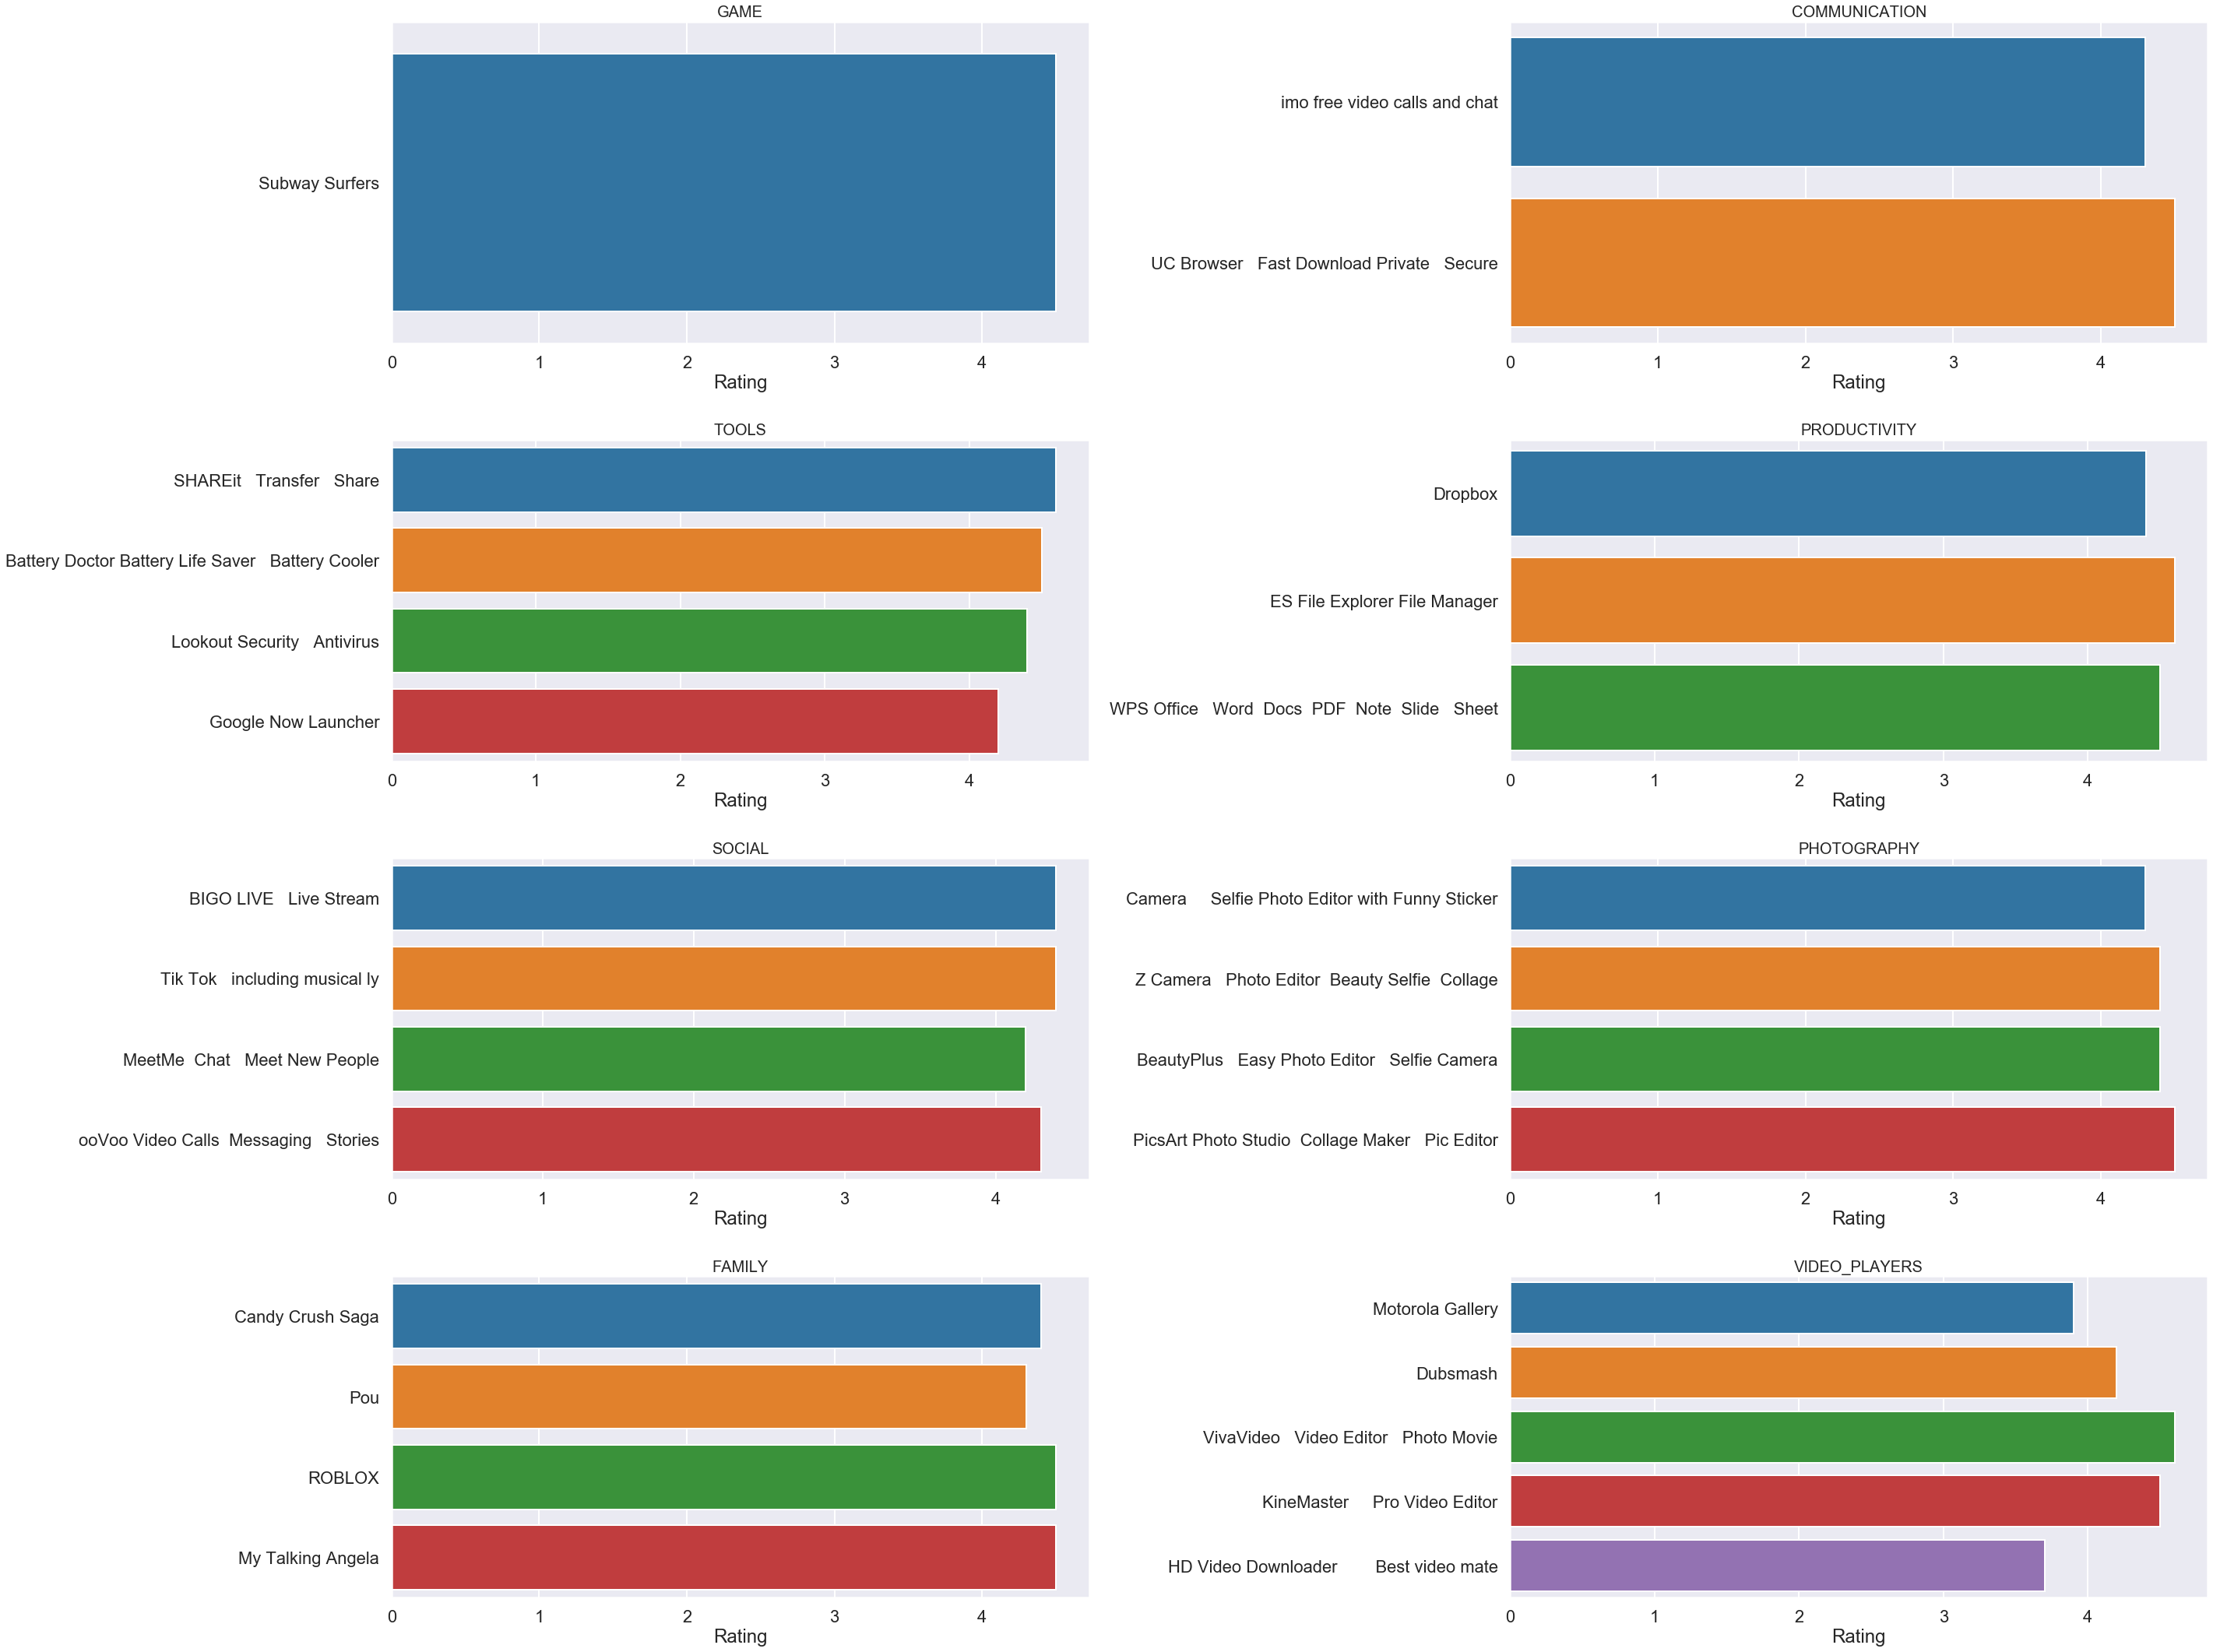

In [34]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY','FAMILY', 'VIDEO_PLAYERS' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df1[df1.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Rating' ,y='App' )
    plt.xlabel('Rating')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

We produced the bar graphs that show the most popular 5 apps in some of the categories based on their ratings. The apps with maximum rating are as follows: 
1. GAME - Subway Surfers
2. COMMUNICATION- UC Browser
3. TOOLS - SHAREit
4. PRODUCTIVITY - ES file explorer
5. SOCIAL - BIGO live Stream and TikTok
6. PHOTOGRAPHY- PicsArt
7. FAMILY- ROBLOX and My Talking Angela
8. VIDEO PLAYERS - ViVa Video


# Most reviewed apps 

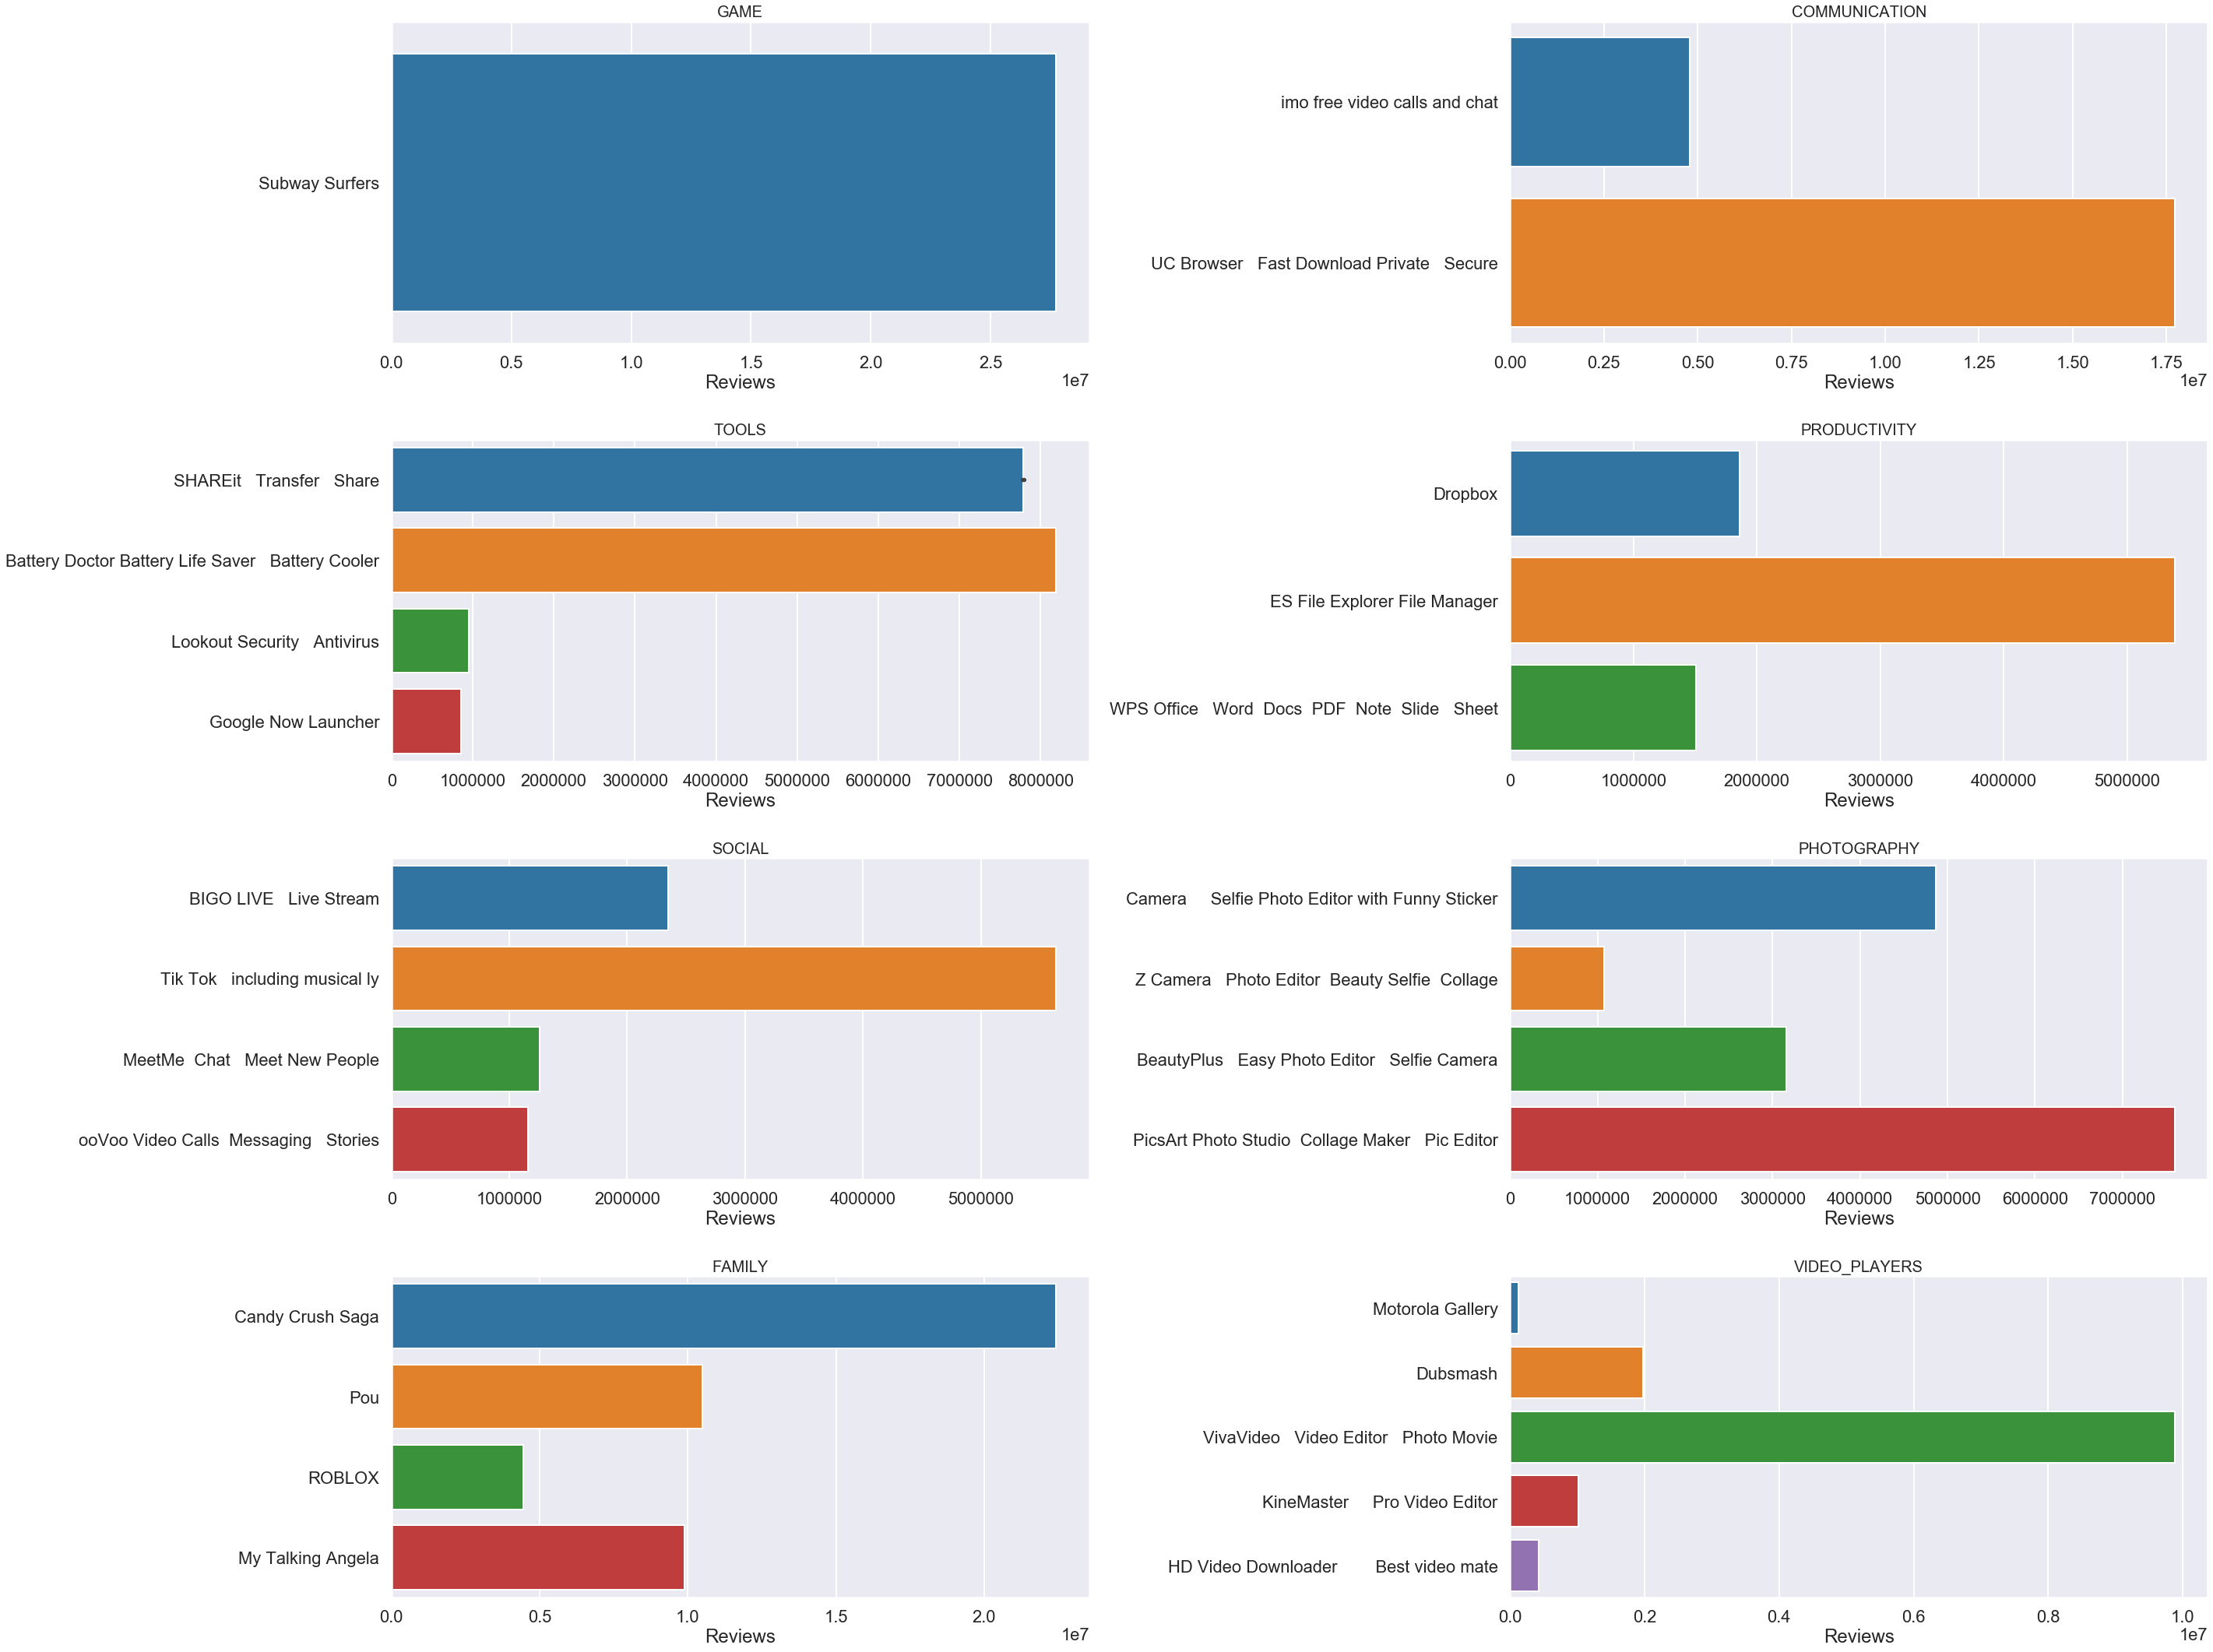

In [35]:
apps = ['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY','FAMILY', 'VIDEO_PLAYERS']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df1[df1.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Reviews' ,y='App' )
    plt.xlabel('Reviews')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

Apps with most reviews in the following categories are as follows :

1. GAME - Subway Surfers 
2. COMMUNICATION- UC Browser
3. TOOLS - Battery Doctor
4. PRODUCTIVITY - ES file Explorer
5. SOCIAL - TikTok
6. PHOTOGRAPHY- PicsArt
7. FAMILY- Candy Crush Saga
8. VIDEO PLAYERS - ViVa Video


# Categories with rating 5

Text(0.5, 1.0, 'Apps with Rating 5')

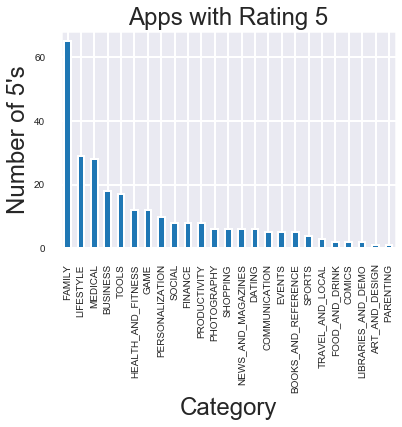

In [36]:
df_top=df1[df1['Rating']==5]
df_top['Category'].value_counts().plot(kind='bar')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Category')
plt.ylabel("Number of 5's")
plt.title('Apps with Rating 5')

The above graph shows that most of the apps rated as 5 belongs to the category 'Family' followed by category 'Lifestyle'

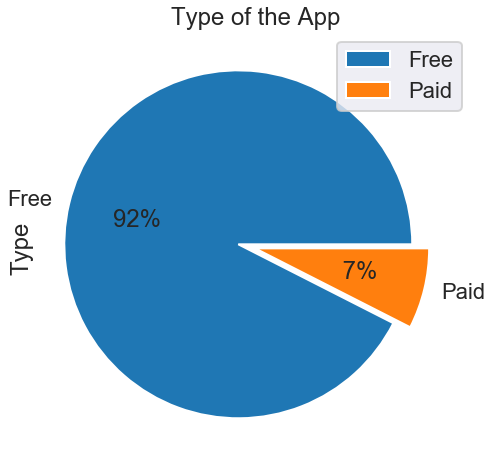

In [37]:
plt.figure(figsize=(8,8))
explode=[0.1,0]
df1['Type'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.title('Type of the App')
plt.legend()
plt.show()

The pie chart above shows that most of the apps are free of charge (93%)

In [38]:

df1.groupby('Type')['Installs'].mean()

Type
Free   0.009
Paid   0.000
Name: Installs, dtype: float64

We also compared the average number of installs (in millions) for paid versus free apps. As we can see above that the average number of installs of free apps is higher than paid apps. 

In [39]:
# correlation analysis
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000,0.080,-0.019,0.053,-0.021
Reviews,0.080,1.000,0.037,0.626,-0.010
Size,-0.019,0.037,1.000,0.017,0.018
Installs,0.053,0.626,0.017,1.000,-0.011
Price,-0.021,-0.010,0.018,-0.011,1.000


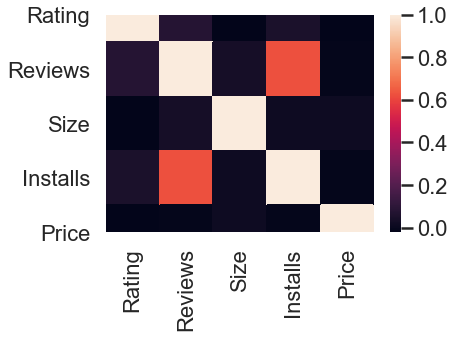

In [40]:
sns.heatmap(df1.corr())

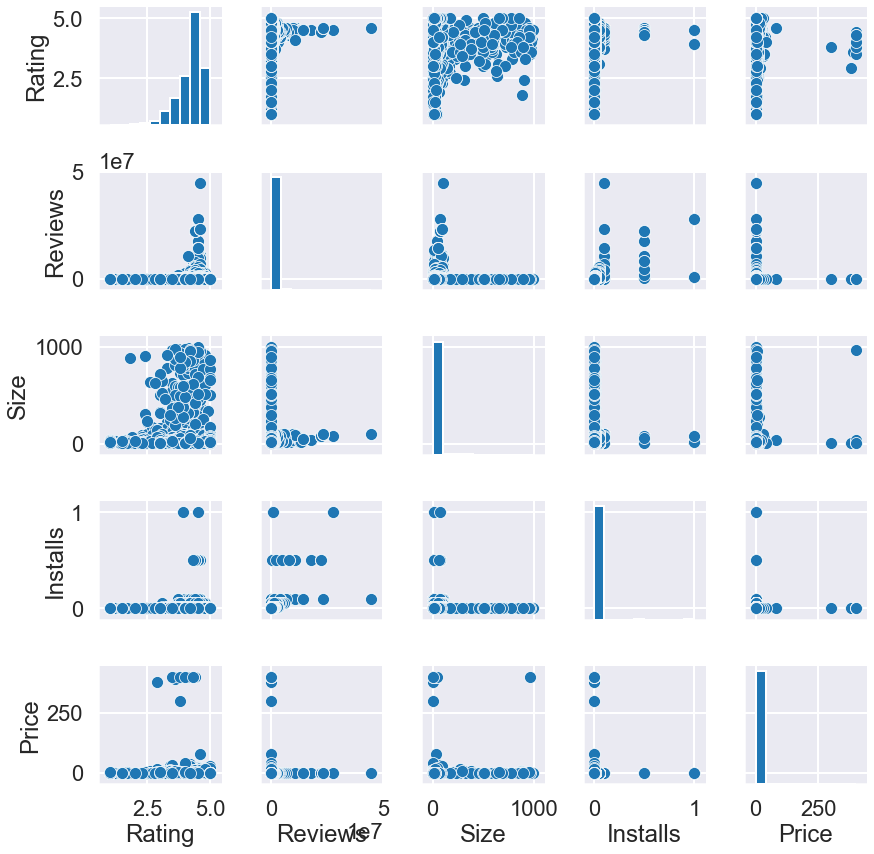

In [41]:
sns.pairplot(df1)

Based on the correlation coefficient  between 'Installs' and 'Reviews' (0.63) ,we can conclude that the more review the app receives the more it is installed. We could not find significant correlation between 'Rating' and the other variables. 

# Conclusions

1-  The Average rating is 4.17 and the meadian average is 4.3.  

2-  Although mean and median rating are not significantly different rating has a left-skewed distribution because of small portion of small rating values. However, the rating values are mostly above 3.

3-  No significant difference in average rating of different age groups.

4-  We could not find significant difference in mean rating between app type (Free vs. Paid)


5-  Based on the number of installs, we found that the most popular category is 'GAME'


6-  We also obtained app specific results for popularity based on the number of installs, rating and reviews above. 


7-  We saw that rating does not show significant correlation with the other variables. 


8-  We observe that 'Installs' and 'Reviews' are moderately positively correlated. Therefore, we think that people should be encoureged to leave reviews.